In [42]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import scipy.io as sio
from rich import print

In [43]:
# Load the dataset
data = sio.loadmat('./spectral_codeChallenge.mat')
# Assume the signal is stored under the key 'signal'
signal = data['signal'].flatten()
srate = data['srate'].flatten()
time = data['time'].flatten()

# Sampling parameters
Fs = srate[0]  # Sampling frequency in Hz
Ts = 1 / Fs  # Sampling interval in seconds

# Time vector
t = np.arange(-2.5, 3.0, Ts)

# Ensure the signal length matches the time vector length
signal = signal[:len(t)]

print(f'Signal length: {len(signal)}\nTime vector length: {len(t)}\nSampling frequency: {Fs} Hz (sampling interval: {Ts} s)')

Signal length: 5500
Time vector length: 5500
Sampling frequency: 1000 Hz (sampling interval: 0.001 s)

In [44]:
# Segment parameters
segment_duration = 0.5  # in seconds
segment_samples = int(segment_duration * Fs)
num_segments = int(len(signal) / segment_samples)

print(f'Segment duration: {segment_duration} s\nSegment samples: {segment_samples}\nNumber of segments: {num_segments}')

Segment duration: 0.5 s
Segment samples: 500
Number of segments: 11

In [45]:
# Frequency vector for FFT
freqs = np.fft.fftfreq(segment_samples, Ts)
positive_freqs = freqs[:segment_samples // 2]

print(f'positive_freqs:\n{positive_freqs}')
print(f'freqs.shape: {freqs.shape}')
print(f'segment length: {segment_samples}')
print(f'positive_freqs.shape: {positive_freqs.shape}')

positive_freqs:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 394. 396. 398. 400. 402. 404. 406. 408. 410. 412. 414. 416. 418.
 420. 422. 424. 426. 428. 430. 432. 434. 436. 438. 440. 442. 444. 446.
 448. 450. 452. 454. 456. 458. 460. 462. 464. 466. 468. 470. 472. 474.
 476. 478. 480. 482. 484. 486. 488. 490. 492. 494. 496. 498.]

freqs.shape: (500,)

segment length: 500

positive_freqs.shape: (250,)

In [46]:
# Indices for frequencies up to 40Hz
freq_indices = np.where((positive_freqs >= 0) & (positive_freqs <= 40))[0]

# Initialize the spectrogram matrix
spectrogram_matrix = np.zeros((len(freq_indices), num_segments))

print(f'freq_indices:\n{freq_indices}')
print(f'spectrogram_matrix.shape: {spectrogram_matrix.shape} (21 frequencies x 11 time bins)')
print(f'spectrogram_matrix:\n{spectrogram_matrix}')

time_bins = np.arange(-2.5, 3.0, segment_duration)
print(f'time_bins:\n{time_bins}')

freq_indices:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

spectrogram_matrix.shape: (21, 11) (21 frequencies x 11 time bins)

spectrogram_matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

time_bins:
[-2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]

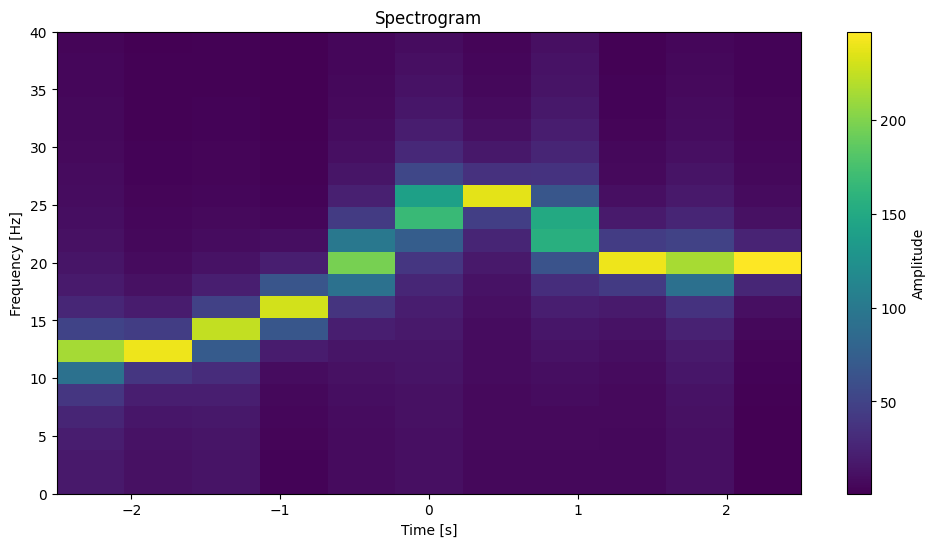

In [47]:
# Process each segment
for i in range(num_segments):
    start_idx = i * segment_samples
    end_idx = start_idx + segment_samples
    segment = signal[start_idx:end_idx]
    # Compute FFT
    segment_fft = fft(segment)
    # Compute magnitude
    segment_fft_mag = np.abs(segment_fft[:segment_samples // 2])
    # Store magnitudes for frequencies up to 40Hz
    spectrogram_matrix[:, i] = segment_fft_mag[freq_indices]

# Time bins for plotting (computed above)
# time_bins = np.arange(-2.5, 3.0, segment_duration)

# Frequency bins for plotting
freq_bins = positive_freqs[freq_indices]

# Plot the spectrogram matrix
plt.figure(figsize=(12, 6))
plt.imshow(
    spectrogram_matrix,
    aspect='auto',
    extent=[time_bins[0], time_bins[-1], freq_bins[-1], freq_bins[0]],
    cmap='viridis'
)
plt.colorbar(label='Amplitude')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.gca().invert_yaxis()
plt.show()
